<a href="https://colab.research.google.com/github/orlandojsjunior/Data_Science-explorando_e_analisando_dados/blob/main/Explorando_e_analisando_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import pandas as pd

In [149]:
notas = pd.read_csv("https://raw.githubusercontent.com/orlandojsjunior/Data_Science-explorando_e_analisando_dados/main/Dados/ratings.csv")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [150]:
notas.shape

(100836, 4)

In [151]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [152]:
notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [153]:
notas["nota"].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [154]:
notas["nota"].mean()

3.501556983616962

<Axes: ylabel='Frequency'>

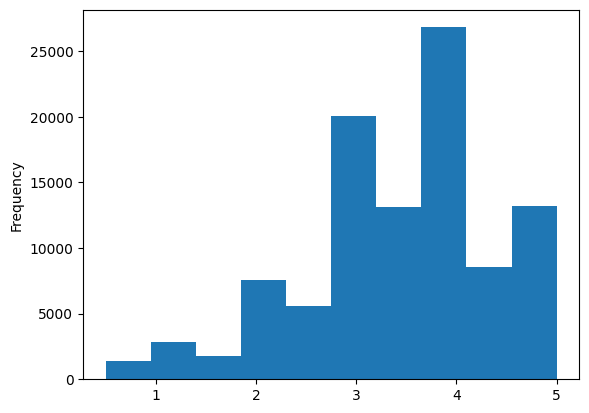

In [155]:
notas["nota"].plot(kind='hist')

In [156]:
notas["nota"].median()

3.5

In [157]:
mediana = notas["nota"].median()
media = notas["nota"].mean()
print(f"Mediana é {mediana}")
print(f"Média é {media}")

Mediana é 3.5
Média é 3.501556983616962


In [158]:
notas["nota"].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: ylabel='nota'>

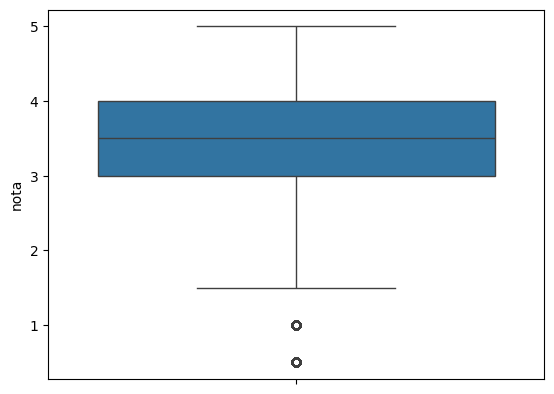

In [159]:
import seaborn as sns

sns.boxplot(notas["nota"])

# Filmes

In [160]:
filmes = pd.read_csv("https://raw.githubusercontent.com/orlandojsjunior/Data_Science-explorando_e_analisando_dados/main/Dados/movies.csv")
filmes.columns = ["filmeId", "titulo", "genero"]
filmes

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [161]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [162]:
notas.query("filmeId == 1")["nota"].mean()


3.9209302325581397

In [163]:
notas.query("filmeId == 2")["nota"].mean()

3.4318181818181817

In [164]:
notas.groupby("filmeId")

In [165]:
notas.groupby("filmeId")["nota"].mean()

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [166]:
medias_por_filme = notas.groupby("filmeId")["nota"].mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

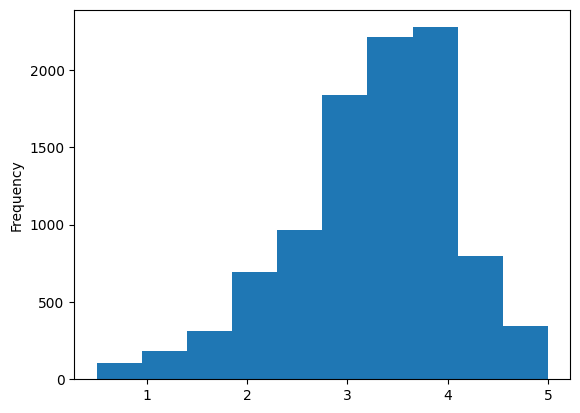

In [167]:
medias_por_filme.plot(kind="hist")

# Distribuindo as médias dos filmes

In [168]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [169]:
import seaborn as sns

<Axes: ylabel='nota'>

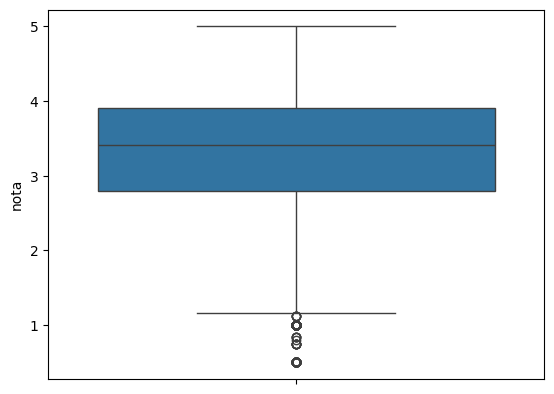

In [170]:
sns.boxplot(medias_por_filme)

In [171]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

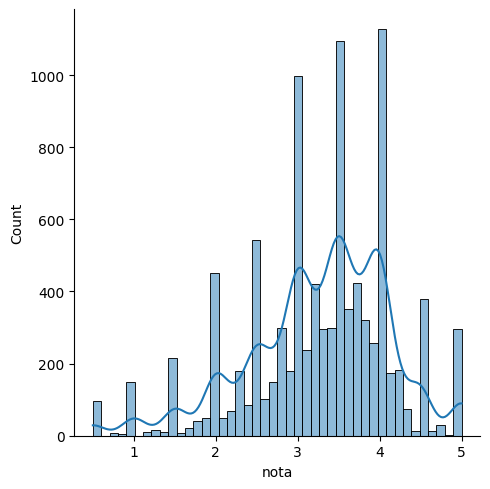

In [172]:
sns.displot(medias_por_filme,kde=True)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

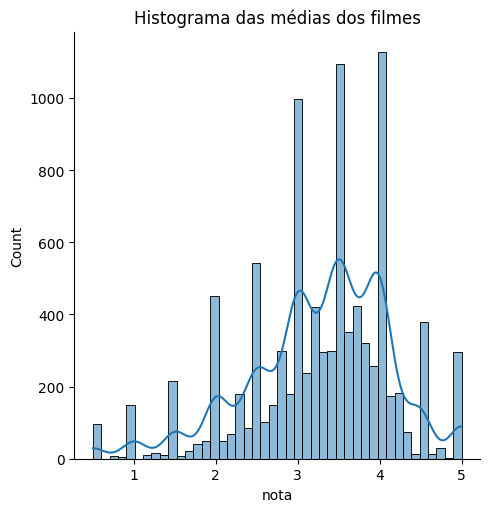

In [173]:
import matplotlib.pyplot as plt

sns.displot(medias_por_filme, kde=True)
plt.title("Histograma das médias dos filmes")


# Faça como eu fiz: analisando os dados dos filmes

Vamos iniciar fazendo uma nova importação dos dados, desta vez, copiando e colando o link do GitHub da base com o nome dos filmes separados pelo ID e os gêneros, alterando o nome das colunas e lendo os primeiros cinco valores:

In [174]:
filmes = pd.read_csv("https://raw.githubusercontent.com/orlandojsjunior/Data_Science-explorando_e_analisando_dados/main/Dados/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Desta base, vamos nos concentrar na análise dos 2 primeiros filmes “Toy Story” e “Jumanji” chamando-os por meio de seus IDs na base notas que criamos na aula anterior. Para isso, vamos ler a média das notas de cada um dos 2 filmes utilizando o método query():

In [175]:
notas.query("filmeId==1")["nota"].mean() # Média das notas de Toy Story
notas.query("filmeId==2")["nota"].mean()	 # Média das notas de Jumanji

3.4318181818181817

Agora, vamos calcular média de todos filmes individualmente, agrupando-os por meio do método groupby() e utilizando como fórmula de agregação de dados o mean().

In [176]:
medias_por_filme = notas.groupby("filmeId")["nota"].mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Vamos observar agora a distribuição das médias por filme? Criaremos um histograma e um boxplot, separadamente para esse processo:

<Axes: ylabel='Frequency'>

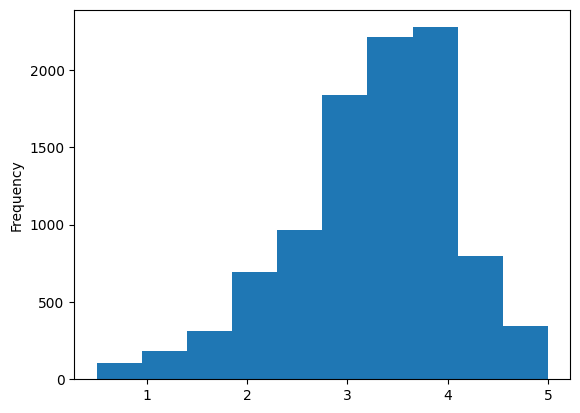

In [177]:
medias_por_filme.plot(kind="hist")

<Axes: ylabel='nota'>

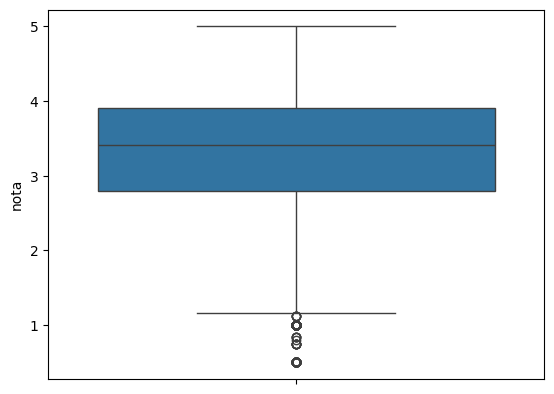

In [178]:
sns.boxplot(medias_por_filme)

Por fim, para conseguirmos observar os dados que o boxplot apresenta, vamos ler o resumo dos dados com o describe().

In [179]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

### Pronto, agora é com você! Como podemos criar um histograma das médias dos filmes com a biblioteca Seaborn? E adicionar um título em nosso visual?

Text(0.5, 1.0, 'Histograma das médias dos filmes')

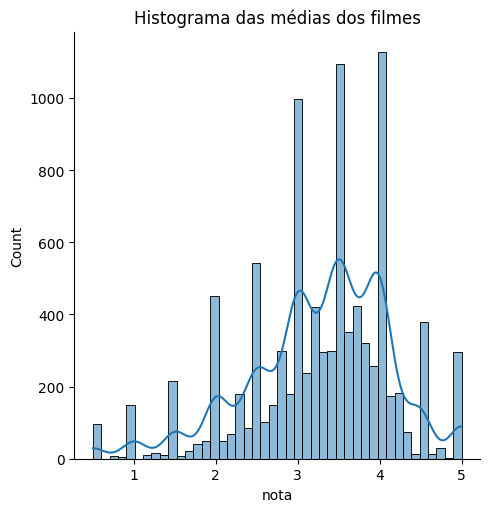

In [180]:
import matplotlib.pyplot as plt

sns.displot(medias_por_filme, kde=True)
plt.title("Histograma das médias dos filmes")

# Aula 3 - Atividade 2 - Explorando a base do TMDB

In [181]:
tmdb = pd.read_csv("https://raw.githubusercontent.com/orlandojsjunior/Data_Science-explorando_e_analisando_dados/main/Dados/tmdb_5000_movies.csv")
                    
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


 ### Alguns dados que figuram na base são:

- budget: o valor do orçamento do filme;
- genres: os gêneros do filme;
- homepage: a página do filme na internet;
- id: identificação do filme;
- keywords: as palavras-chave associadas ao filme.

In [182]:
tmdb.shape

(4803, 20)

## Distribuição da receita dos filmes

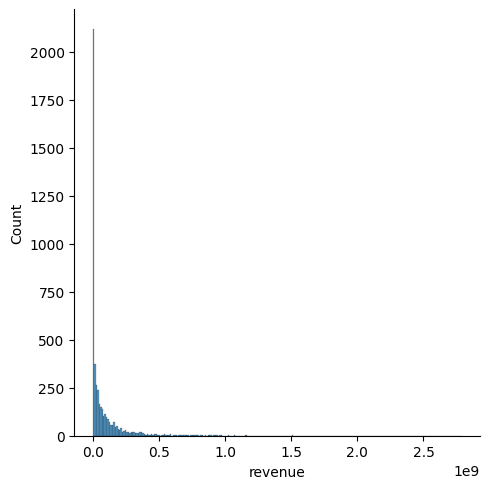

In [183]:
sns.displot(tmdb["revenue"])

Text(0.5, 1.0, 'Distribuição da receita dos filmes')

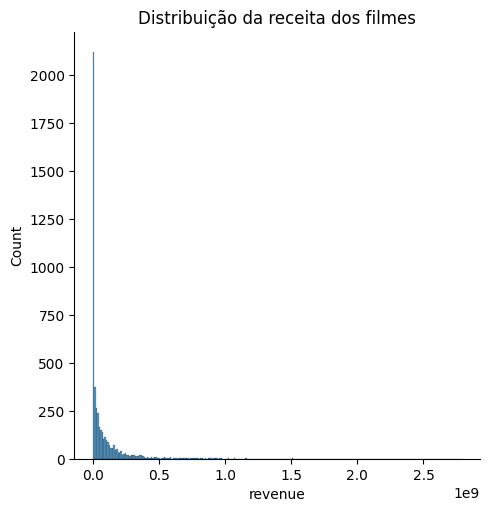

In [184]:
sns.displot(tmdb["revenue"])
plt.title("Distribuição da receita dos filmes")

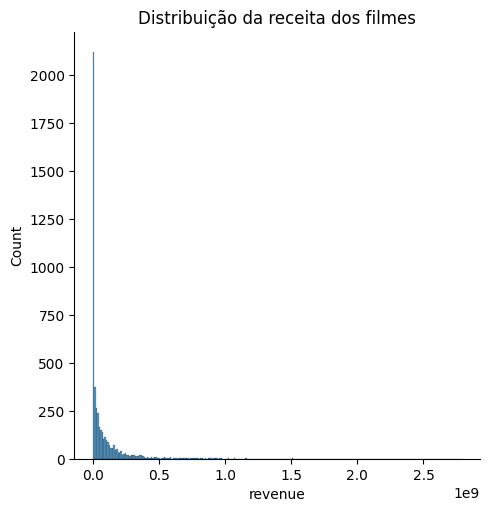

In [185]:
sns.displot(tmdb["revenue"])
plt.title("Distribuição da receita dos filmes")
plt.show()

## Distribuição do orçamento dos filmes

#### Gráfico de distribuição do orçamento dos filmes (budget)

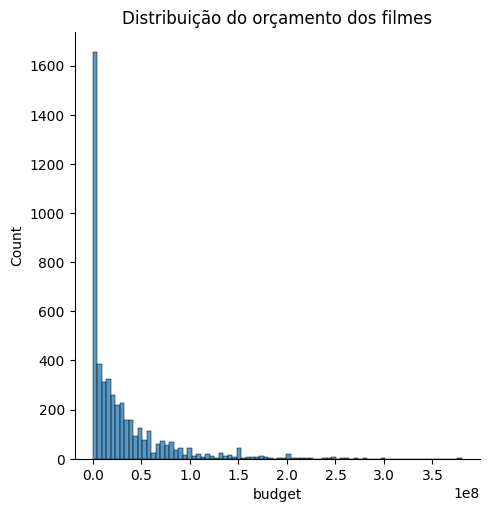

In [186]:
import matplotlib.pyplot as plt

sns.displot(tmdb["budget"])
plt.title("Distribuição do orçamento dos filmes")
plt.show()

In [187]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [188]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## Pesquisa sobre o faturamento

In [189]:
tmdb.query("revenue < 500")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Love is longer than life.,The Lovers,4.8,34
135,150000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",http://www.thewolfmanmovie.com/,7978,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-11,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When the moon is full the legend comes to life,The Wolfman,5.5,549
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",NaN,10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-11-21,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366
309,84000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",NaN,10214,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 2546, ""n...",en,Son of the Mask,"Tim Avery, an aspiring cartoonist, finds himse...",17.815595,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2005-02-18,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Who's next?,Son of the Mask,3.6,338
376,90000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,10357,"[{""id"": 1552, ""name"": ""subway""}, {""id"": 2859, ...",en,Volcano,An earthquake shatters a peaceful Los Angeles ...,19.836124,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-04-25,0,104.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,The coast is toast,Volcano,5.2,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7


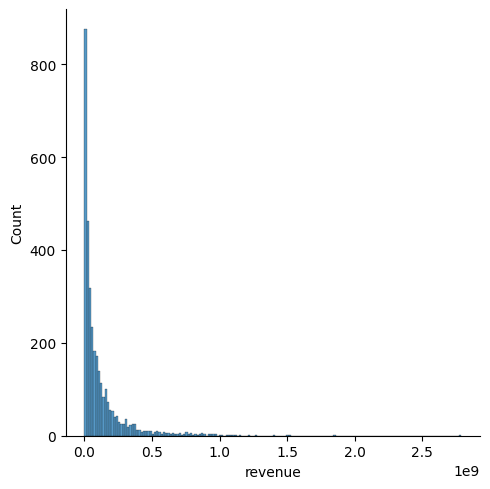

In [190]:
com_faturamento = tmdb.query("revenue > 0")
sns.displot(com_faturamento["revenue"])
plt.show()

# Aula 3 - Atividade 4 Tipos de variáveis

### Línguas originais de um filme

In [191]:
tmdb['original_language']

0       en
1       en
2       en
3       en
4       en
        ..
4798    es
4799    en
4800    en
4801    en
4802    en
Name: original_language, Length: 4803, dtype: object

In [192]:
tmdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [193]:
tmdb['original_language'].value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

## Variáveis categóricas e numéricas

### Podemos classificar tipos de variáveis como numéricas (quantitativa) ou categóricas (qualitativa).

A categórica pode ser um número, como a nota, mas também pode ser um texto. E existem diversas formas de trabalhar com essas variáveis.

Para exemplificar, a variável do **budget**, que é o orçamento, dá uma quantidade. Portanto, ela é uma **variável quantitativa** - e não qualitativa.

Além disso, ela tem uma ordem, pois vai do orçamento mais barato ao mais caro, ou seja, do menor para o maior. Então, ela é uma quantitativa que tem uma ordem e também é contínua. O orçamento poderia ser 357, mas também poderia ser 1.400.000. Poderia ser qualquer número.

Em suma, ela é quantitativa contínua, pois pode assumir qualquer valor no intervalo possível.

Nesse sentido, o orçamento não é infinitamente contínuo, porque não pode assumir valores mais infinito ou menos infinito. Afinal, não faz sentido o orçamento ser negativo. Contudo, a variável é considerada contínua, porque pode assumir todos esses valores.

Em contrapartida, a nota era uma categoria. As notas do Movie Lens variava entre 0.5 a 5. Isto é, você tem que escolher entre uma dessas, por isso, é considerada categórica.

Outra variável interessante é a quantidade de votos, que seria a soma de votos. Essa variável pode assumir valores 1, 2, 3, 4 e 5 e, portanto, não é contínua, porque não existe 2.5. É, no mínimo, estranho dizer que as pessoas tiveram em média 2.5 votos.

Quando uma variável não é contínua, não usamos a média. Nesses casos, podemos usar a mediana. Podemos dizer que mediana de votos nos filmes é 3. Isso quer dizer que metade dos filmes tiveram menos de 3 votos, metade dos filmes tiveram mais de 3 votos.

### Conclusão

É importante entender que existem tipos de variáveis e precisamos tratá-los de maneiras diferentes.

Para um orçamento, faz todo sentido calcular a média e a mediana. Dificilmente terá sentido falar de moda, porque cada orçamento será completamente diferente do outro.

Já para a nota do Movie Lens faz todo sentido falar de moda, porque você tem que escolher uma dessas categorias. Também faz sentido saber a mediana, que divide metade de metade. A média, apesar de ter algumas restrições, também é possível.

Em contrapartida, não faz sentido falar de média para a quantidade de votos. Só de mediana e moda.

Lembrando que é muito importante saber se essas variáveis tem ordem ou não. Nesses casos, todas elas têm ordem de menor e maior. Mas, a língua original é uma variável categórica sem ordem. Por padrão, ela não tem ordem. Não estamos falando de uma ordem alfabética.

Enquanto a língua original é uma categórica sem ordem, a nota do Movie Lens é uma categórica com ordem.

É importante sabermos os tipos de variáveis para sabermos o que podemos fazer com esses dados. Vamos trabalhar com eles daqui a pouco.